In [104]:
import requests
import torch
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import numpy as np

In [105]:
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-cityscapes-instance")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-cityscapes-instance")

In [106]:
print(model.config.label2id)

{'bicycle': 7, 'bus': 4, 'car': 2, 'motorcycle': 6, 'person': 0, 'rider': 1, 'train': 5, 'truck': 3}


In [107]:
from torchvision.datasets import Cityscapes
dataset = Cityscapes("./data/", split="val", mode="fine", target_type="instance")
dataset

Dataset Cityscapes
    Number of datapoints: 500
    Root location: ./data/
    Split: val
    Mode: gtFine
    Type: ['instance']

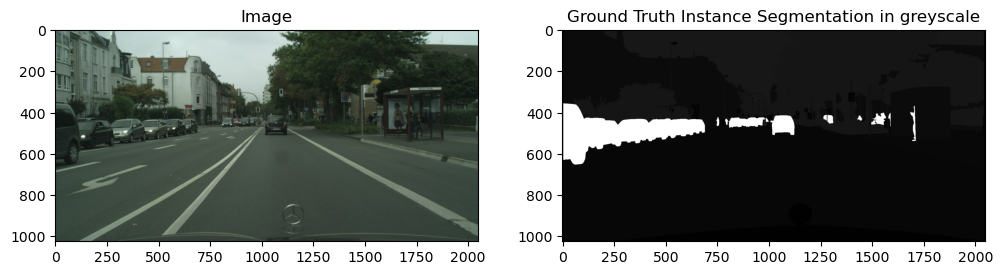

In [108]:
image=dataset[0][0]
fig,ax=plt.subplots(ncols=2,figsize=(12,8))
ax[0].set_title("Image")
ax[0].imshow(image)
ax[1].set_title("Ground Truth Instance Segmentation in greyscale")
ax[1].imshow(dataset[0][1])

In [109]:
ground_truth = np.array(dataset[0][1])
ground_truth[500][11]

26015

In [110]:
np.unique(ground_truth)

array([    0,     1,     3,     4,     6,     7,     8,    11,    12,
          17,    19,    20,    21,    23, 24000, 24001, 24002, 24003,
       24004, 24005, 24006, 25000, 26000, 26001, 26002, 26003, 26004,
       26005, 26006, 26007, 26008, 26009, 26010, 26011, 26012, 26013,
       26014, 26015, 33000, 33001], dtype=int32)

In [111]:
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
result = processor.post_process_instance_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
predicted_instance_map = result["segmentation"]

In [112]:
def predict_picture(image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return processor.post_process_instance_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

In [113]:
result

{'segmentation': tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]),
 'segments_info': [{'id': 0,
   'label_id': 0,
   'was_fused': False,
   'score': 0.909489},
  {'id': 1, 'label_id': 2, 'was_fused': False, 'score': 0.986076},
  {'id': 2, 'label_id': 2, 'was_fused': False, 'score': 0.984574},
  {'id': 3, 'label_id': 2, 'was_fused': False, 'score': 0.98176},
  {'id': 4, 'label_id': 6, 'was_fused': False, 'score': 0.938674},
  {'id': 5, 'label_id': 0, 'was_fused': False, 'score': 0.782329},
  {'id': 6, 'label_id': 0, 'was_fused': False, 'score': 0.815179},
  {'id': 7, 'label_id': 2, 'was_fused': False, 'score': 0.840066},
  {'id': 8, 'label_id': 2, 'was_fused': False, 'score': 0.631396},
  {'id': 9, 'label_id': 2, 'was_fused': False, 'score': 0.

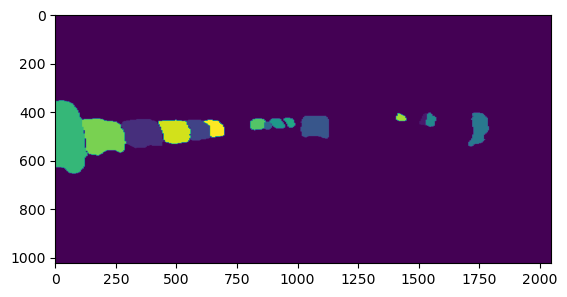

In [114]:
plt.imshow(predicted_instance_map)

# Plot the Instance Segmentation Over the Picture

In [115]:
color_palette = [list(np.random.choice(range(256), size=3)) for _ in range(len(np.unique(predicted_instance_map)))]

In [116]:
np.unique(predicted_instance_map)

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14.], dtype=float32)

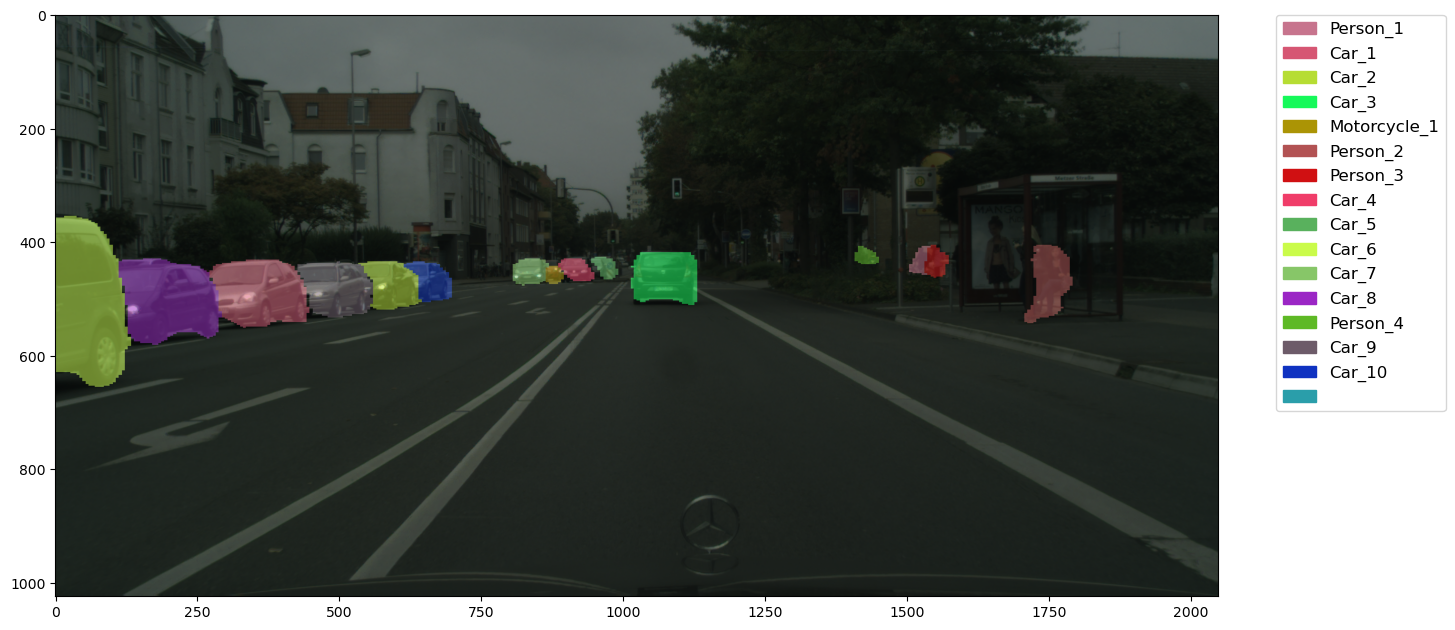

In [124]:
import matplotlib.patches as mpatches

reversed_label_dict = {0: "Person_1", 1: "Car_1", 2: "Car_2", 3: "Car_3", 4: "Motorcycle_1", 5: "Person_2", 6: "Person_3", 7:"Car_4", 8: "Car_5",
                       9:"Car_6", 10:"Car_7", 11:"Car_8", 12:"Person_4", 13:"Car_9", 14:"Car_10", -1: "Not predicted", 15: ""}

seg = predicted_instance_map
color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
palette = np.array(color_palette)
for label, color in enumerate(palette):
    color_seg[seg == label, :] = color
# Convert to BGR
color_seg = color_seg[..., ::-1]

# Show image + mask
img = np.array(image) * 0.5 + color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)

handles = []
for label, color in enumerate(palette):
    # Convert the color from RGB to BGR for the legend
    bgr_color = color[::-1] / 255  # Convert to BGR and normalize to [0, 1]
    patch = mpatches.Patch(color=bgr_color, label=reversed_label_dict[label])
    handles.append(patch)

# Add the legend to the plot
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize="large")

plt.show()

In [49]:
model_to_ground_truth_mapping = {
    0:8,
    1:8,
    2:8,
    3:8,
    4:8,
    5:8,
    6:8,
    7:8,
    8:8,
    9:8,
    10:8,
    11:8,
    12:8,
    13:8,
    14:8,
    15:8,
    16:8,
    17:8,
    18:8,
    19:8,
    20:8,
    21:8,
    22:8,
    23:8,
    24:0,
    25:1,
    26:2,
    27:3,
    28:4,
    29:8,
    30:8,
    31:5,
    32:6,
    33:7
}

In [50]:
ground_truth_to_model_mapping = {
  0: 24,
  1: 25,
  2: 26,
  3: 27,
  4: 28,
  5: 31,
  6: 32,
  7: 33,
}

### Map the predicted map to form 24001, 24002, etc

In [51]:
findings = result["segments_info"]

In [52]:
def fix_counter_string(number):
    number_str = str(number) 
    if len(number_str) == 1:
        return "00" + number_str
    elif len(number_str) == 2:
        return "0" + number_str
    else:
        return number_str
     
def map_predicted(predicted):
    label_counter = {}
    array = predicted["segmentation"].numpy()
    findings = predicted["segments_info"]
    for finding in findings:
        
        if label_counter.get(finding["label_id"]) is None:
            label_counter[finding["label_id"]] = -1
        label_counter[finding["label_id"]] = label_counter.get(finding["label_id"]) + 1
        
        counter_string = fix_counter_string(label_counter.get(finding["label_id"]))
        
        mapped_class = str(ground_truth_to_model_mapping.get(finding["label_id"]))
        value_as_string = mapped_class + counter_string
        
        array[array == finding["id"]] = int(value_as_string)
    return array.astype(np.int32)
        
mapped = map_predicted(result)
np.unique(mapped)

array([   -1, 24000, 24001, 24002, 24003, 26000, 26001, 26002, 26003,
       26004, 26005, 26006, 26007, 26008, 26009, 32000], dtype=int32)

26007


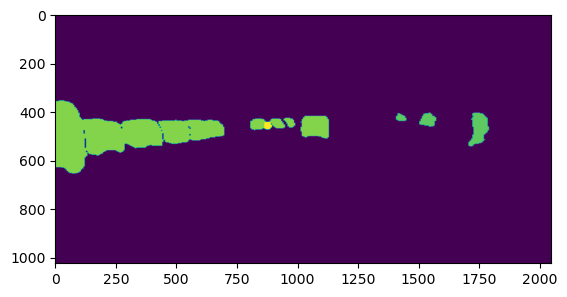

In [53]:
print(mapped[500][250])
plt.imshow(mapped)

## Create Dict with all correct predictions

In [54]:
def iou_for_id(pred_obj_id, gt_obj_id, predicted_array, ground_truth_array):
    pred_mask = predicted_array == pred_obj_id
    gt_mask = ground_truth_array == gt_obj_id

    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)

    if np.sum(union) == 0:
        return 0
    else:
        return np.sum(intersection) / np.sum(union)
    
iou_for_id(26005, 26015, mapped, ground_truth)

0.906226857566033

In [55]:
def check_for_ground_truth(predicted_id, ground_truth_labels, treshold, predicted_array, ground_truth_array):
    for ground_truth_label in ground_truth_labels:
        iou = iou_for_id(predicted_id, ground_truth_label, predicted_array, ground_truth_array)
        if iou > treshold:
            return True
    return False

In [56]:
check_for_ground_truth(26007, [26000, 26001,26002, 26003,26004,26005,26006,26007,26008,26009,26010,26011,26012,26013,26014,26015], 0.5, mapped, ground_truth)

True

In [89]:
correct_predicts = {}
mapped_prediction_ids = []
def find_instances_in_picture(i, mapped_pred_array, ground_truth_array):
    unique_predictions = np.unique(mapped_pred_array)
    mapped_prediction_ids.append(unique_predictions)
    for predicted in unique_predictions:
        ground_truth_labels = np.unique(ground_truth_array)
        lower_bound = (predicted // 1000) * 1000
        upper_bound = lower_bound + 999
        mask = (ground_truth_labels >= lower_bound) & (ground_truth_labels <= upper_bound)
        filtered_array = ground_truth_labels[mask]
        is_ground_truth = check_for_ground_truth(predicted, filtered_array, 0.5, mapped_pred_array, ground_truth_array)
        if is_ground_truth == True:
            correct_predicts.get(i).append(predicted)

In [90]:
def find_num_ground_truths_for_picture(gt):
    uniques = np.unique(gt)
    mask1 = (uniques >= 24000) & (uniques <= 28999)
    mask2 = (uniques >= 31000) & (uniques <= 33999)
    combined_mask = mask1 | mask2
    filtered_uniques = uniques[combined_mask]
    return len(filtered_uniques)

    
    

In [91]:
total_ground_truths = 0
for i in range(len(dataset)):
    if i % 10 == 0:
        print(i)
    correct_predicts[i] = []
    prediction = predict_picture(dataset[i][0])
    mapped_pred_array = map_predicted(prediction)
    gt = np.array(dataset[i][1])
    total_ground_truths += find_num_ground_truths_for_picture(gt)
    find_instances_in_picture(i, mapped_pred_array, gt)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


## Calulate Precision and Recall

In [ ]:
print("correct predicts")
print(correct_predicts)
print("mapped prediction ids")
print(mapped_prediction_ids)
print("total ground truths")
print(total_ground_truths)

In [92]:
total_tp = sum(len(lst) for lst in correct_predicts.values())
num_detections = sum(len(sublist) for sublist in mapped_prediction_ids) - 2
precision = total_tp / num_detections 
recall = total_tp / total_ground_truths

In [93]:
print(total_tp)
print(num_detections)
print(precision)
print(recall)

3459
7263
0.47624948368442793
0.34183219685739696
